<a href="https://colab.research.google.com/github/KC-ai/APPM4600/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#prelab
def evaluate_line(f, x0, x1, alpha):

    y0, y1 = f(x0), f(x1)
    m = (y1 - y0) / (x1 - x0)
    b = y0 - m * x0
    return m * alpha + b


result = evaluate_line(lambda x: x**2 , 1, 2, 1.5)
print(f"alpha 1.5 is {result}")


alpha 1.5 is 2.5


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import inv
from numpy.linalg import solve, norm

# import mypkg.my2DPlotB


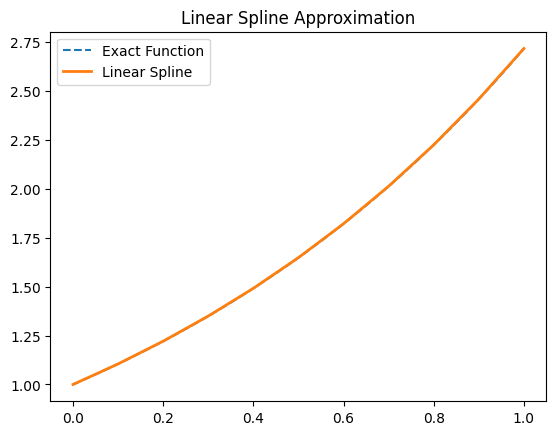

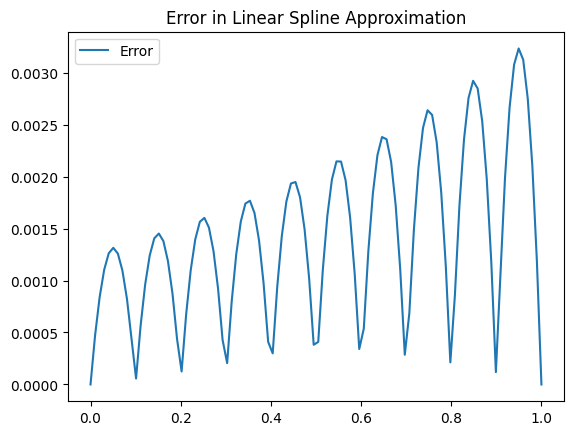

In [6]:
#linear
def eval_lin_spline(xeval, a, b, f, Nint):
    xint = np.linspace(a, b, Nint + 1)
    yeval = np.zeros(len(xeval))

    for jint in range(Nint):
        a1, b1 = xint[jint], xint[jint + 1]
        fa1, fb1 = f(a1), f(b1)

        ind = np.where((xeval >= a1) & (xeval <= b1))[0]

        for kk in ind:
            yeval[kk] = evaluate_line(f, a1, b1, xeval[kk])

    return yeval

def driver():
    f = lambda x: math.exp(x)
    a, b = 0, 1
    Neval = 100
    xeval = np.linspace(a, b, Neval)
    Nint = 10

    yeval = eval_lin_spline(xeval, a, b, f, Nint)

    fex = np.array([f(x) for x in xeval])

    plt.figure()
    plt.plot(xeval, fex, label="Exact Function", linestyle="dashed")
    plt.plot(xeval, yeval, label="Linear Spline", linewidth=2)
    plt.legend()
    plt.title("Linear Spline Approximation")
    plt.show()

    err = abs(yeval - fex)
    plt.figure()
    plt.plot(xeval, err, label="Error")
    plt.legend()
    plt.title("Error in Linear Spline Approximation")
    plt.show()

if __name__ == "__main__":
    driver()

I think Linear spline will perform better than interpolation since it's more stable and doesn't oscillate as heavy as interpolation does, but interpolation has heavy oscillations near the endpoints. Linear spline performs better with uniform nodes.

nerr = 1.9582933695358655


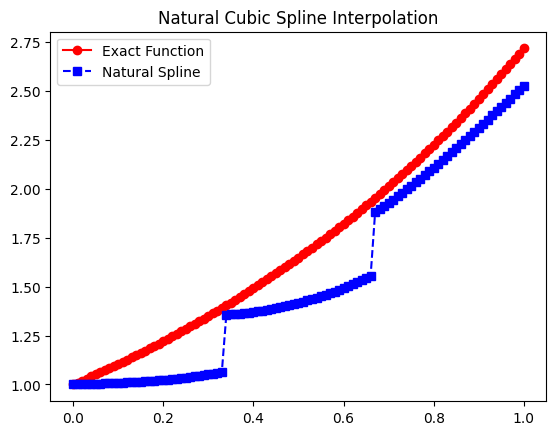

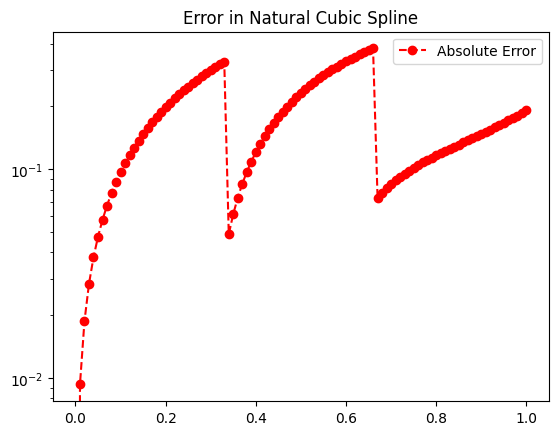

In [10]:
#cubic
def f(x):
    return np.exp(x)

def create_natural_spline(yint, xint, N):
    """ Create coefficients for a natural cubic spline. """
    h = np.diff(xint)

    b = np.zeros(N-1)
    for i in range(1, N):
        b[i-1] = ((yint[i+1] - yint[i]) / h[i] - (yint[i] - yint[i-1]) / h[i-1]) / (h[i-1] + h[i])

    M = np.zeros((N-1, N-1))
    for i in range(N-1):
        M[i, i] = 2 * (h[i] + h[i+1]) / 6
        if i < N-2:
            M[i, i+1] = h[i+1] / 6
            M[i+1, i] = h[i+1] / 6

    A_inner = solve(M, b)
    A = np.zeros(N+1)
    A[1:N] = A_inner

    B = np.zeros(N)
    C = np.zeros(N)
    for j in range(N):
        B[j] = (yint[j+1] - yint[j]) / h[j] - (h[j] / 6) * (A[j+1] - A[j])
        C[j] = yint[j] - (A[j] * h[j]**2) / 6

    return A, B, C

def eval_local_spline(xeval, xi, xip, Ai, Aip, Bi, Ci):
    hi = xip - xi
    si = (xip - xeval) / hi
    sip = (xeval - xi) / hi
    return Ai * (si**3 - si) * (hi**2) / 6 + Aip * (sip**3 - sip) * (hi**2) / 6 + Bi * sip + Ci * si

def eval_cubic_spline(xeval, Neval, xint, Nint, A, B, C):
    yeval = np.zeros(Neval + 1)
    for j in range(Nint):
        atmp, btmp = xint[j], xint[j+1]
        ind = np.where((xeval >= atmp) & (xeval <= btmp))[0]
        xloc = xeval[ind]

        yloc = eval_local_spline(xloc, atmp, btmp, A[j], A[j+1], B[j], C[j])
        yeval[ind] = yloc

    return yeval

def driver():
    a, b = 0, 1
    Nint = 3
    xint = np.linspace(a, b, Nint + 1)
    yint = f(xint)

    Neval = 100
    xeval = np.linspace(xint[0], xint[Nint], Neval + 1)

    A, B, C = create_natural_spline(yint, xint, Nint)

    yeval = eval_cubic_spline(xeval, Neval, xint, Nint, A, B, C)

    fex = f(xeval)
    nerr = norm(fex - yeval)
    print('nerr =', nerr)

    plt.figure()
    plt.plot(xeval, fex, 'ro-', label='Exact Function')
    plt.plot(xeval, yeval, 'bs--', label='Natural Spline')
    plt.legend()
    plt.title("Natural Cubic Spline Interpolation")
    plt.show()

    err = abs(yeval - fex)
    plt.figure()
    plt.semilogy(xeval, err, 'ro--', label='Absolute Error')
    plt.legend()
    plt.title("Error in Natural Cubic Spline")
    plt.show()

if __name__ == "__main__":
    driver()

Cubic spline is the best since it has the benefits that linear spline does of not having oscillations at the end and severe oscillations throughout but it's also more accurate than linear spline and is much more smooth as well.